In [36]:
import csv
import pandas as pd

JOINT_NAMES = ['_s0', '_s1', '_e0', '_e1', '_w0', '_w1', '_w2']

d_input = 7
h_dim1 = 256
h_dim2 = 100
d_output = 7
beta = 0.1
generated_batch_size = 1000
headers = ['latent' + name for name in JOINT_NAMES][0:d_input]
headers.append('collision_free')

file_formatter =  '../../data/latent_space/{}_num_joints/{}_beta/right_{}_{}.csv'
filename = file_formatter.format(str(d_input), str(beta), str(d_input), str(generated_batch_size))

input_data = pd.read_csv(filename, usecols=headers)

# Additional step to preserve the header order when reading data; 
data = input_data[headers].values
X = data[:, :-1]
y = data[:, -1]

# np.random.shuffle(data)
print("The first 5 values from the dataset are: %s" % X[0:5, :])
print("The first 5 collision_free status from the dataset are: %s" % y[0:5])
print("The number of collision-free data points are: %s" % (np.sum(y == 1.0) / y.shape[0]))
print("The number of in-collision data points are: %s" % (np.sum(y == 0.0) / y.shape[0]))

The first 5 values from the dataset are: [[ 0.29222268 -1.41528928  2.49926066  0.45681936 -0.34368908  0.85546654
   2.29631138]
 [ 0.97917819  0.30397397 -0.27266154  1.77952981  2.09329295 -0.54977137
   0.6212815 ]
 [-0.26364672  0.72228169 -1.37600398  2.00435257  0.12721159 -0.88774335
   1.69684947]
 [-0.66622394  0.10754772 -0.51254219  2.01507998  2.84138656  0.04703622
  -0.55709231]
 [-1.40797997 -0.1280203   2.39768004  0.98458523 -0.1321895   0.29129291
  -2.23793697]]
The first 5 collision_free status from the dataset are: [0. 1. 1. 1. 1.]
The number of collision-free data points are: 0.928
The number of in-collision data points are: 0.072


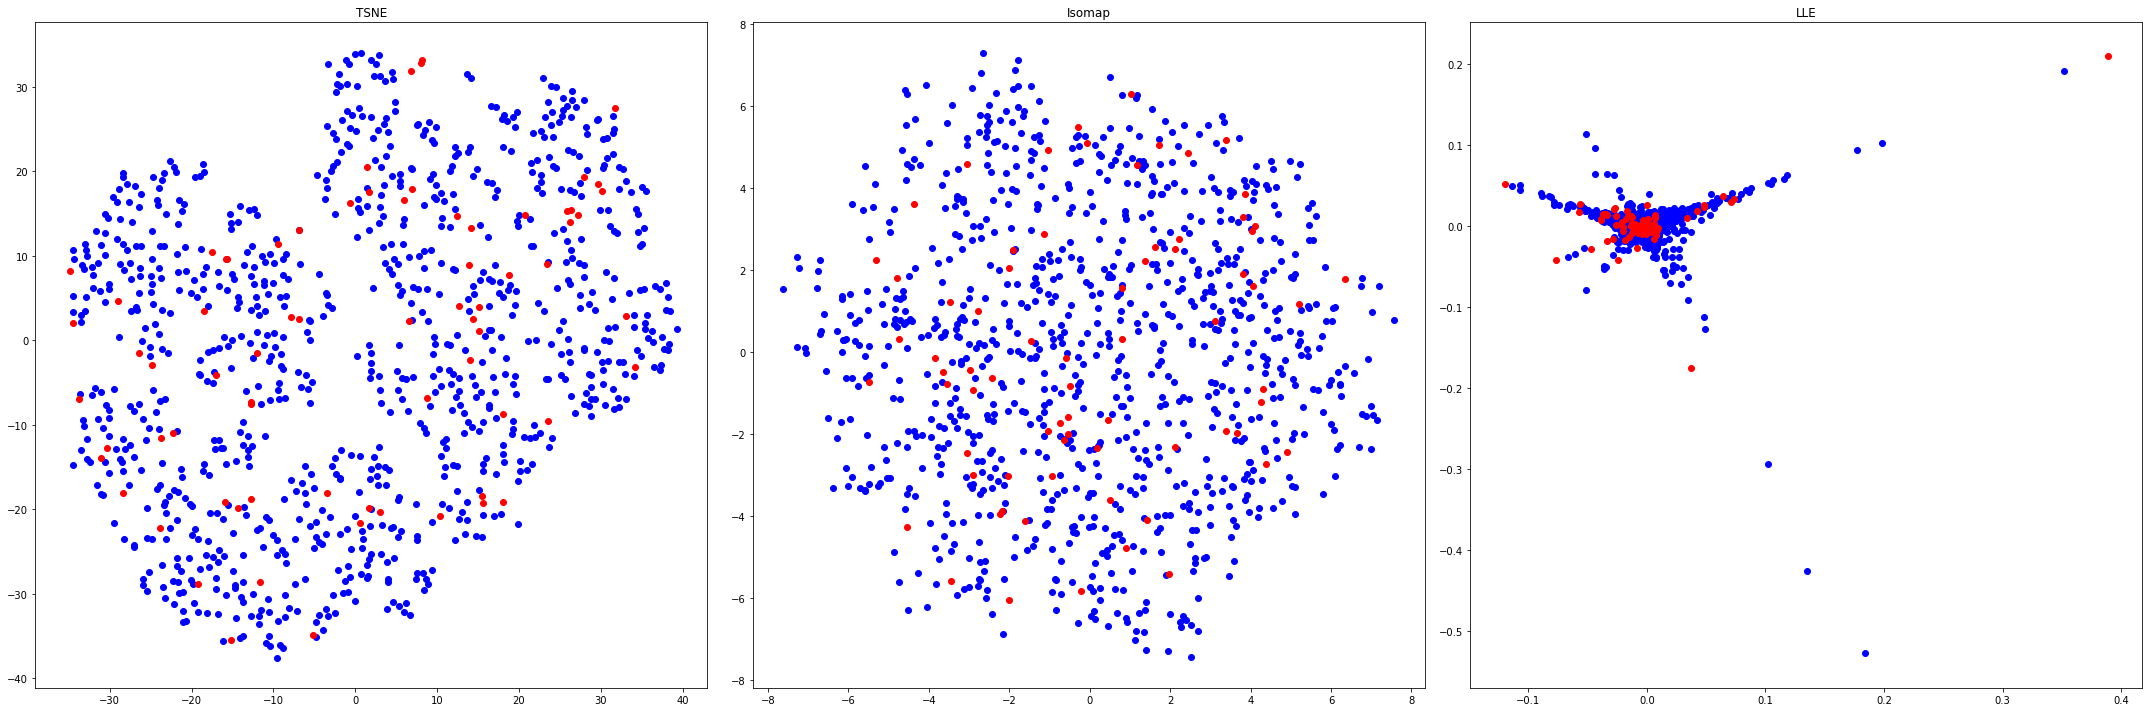

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap

"""
Default parameters for visualizing latent space;
"""

# TODO: Tune parameters for Each manifold learning algorithms;
embedding_names = ["TSNE", "Isomap", "LLE"]

tsne = TSNE(n_components=2)
isomap = Isomap(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)

embeddings = [tsne, isomap, lle]

fig = plt.figure(figsize=(30,10))
for i in range(len(embeddings)):
    embedding = embeddings[i]
    ax = plt.subplot(1, 3, i + 1)
    ax.set_title(embedding_names[i])
    X_embedded = embedding.fit_transform(X)
    X_free = X_embedded[y == 1.0]
    X_in_collision = X_embedded[y == 0.0]
    ax.scatter(X_free[:, 0], X_free[:, 1], c='b')
    ax.scatter(X_in_collision[:, 0], X_in_collision[:, 1], c='r')
plt.tight_layout()
# plt.show()

fig_dir = "../../data/figures"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

plt.savefig(os.path.join(fig_dir,"latent_space_collision_status.png"))